In [178]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data')
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [179]:
cars.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',  'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [180]:
cars.columns[cars.isin(['?']).any()]

Index(['normalized_losses', 'num_doors', 'bore', 'stroke', 'horsepower',
       'peak_rpm', 'price'],
      dtype='object')

In [181]:
cars = cars.replace('?', np.nan)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [234]:
cars['normalized_losses'] = cars['normalized_losses'].astype(float)
# cars['num_doors'].astype(string)
# cars['bore'].astype(string)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float)
cars['peak_rpm'] = cars['peak_rpm'].astype(float)
cars['wheel_base'] = cars['wheel_base'].astype(float)
cars['engine_size'] = cars['engine_size'].astype(float)
cars['price'] = cars['price'].astype(float)

In [183]:
cars['normalized_losses'].isnull().value_counts()

False    164
True      40
Name: normalized_losses, dtype: int64

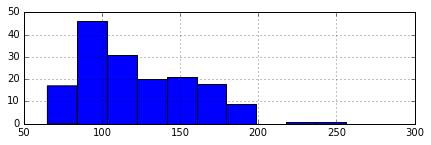

In [184]:
import matplotlib.pyplot as plt
% matplotlib inline
notnull = cars[cars['normalized_losses'].notnull()]['normalized_losses']
plt.figure(figsize=(7,2))
cars['normalized_losses'].hist()

In [185]:
cars['normalized_losses'].mean()

122.0

In [186]:
cars['normalized_losses'] = cars['normalized_losses'].fillna(cars['normalized_losses'].mean())
cars['normalized_losses'].isnull().value_counts()

False    204
Name: normalized_losses, dtype: int64

In [235]:
print(cars['stroke'].isnull().value_counts())
print(cars['horsepower'].isnull().value_counts())
print(cars['peak_rpm'].isnull().value_counts())
print(cars['wheel_base'].isnull().value_counts())
print(cars['engine_size'].isnull().value_counts())
print(cars['price'].isnull().value_counts())

False    192
Name: stroke, dtype: int64
False    192
Name: horsepower, dtype: int64
False    192
Name: peak_rpm, dtype: int64
False    192
Name: wheel_base, dtype: int64
False    192
Name: engine_size, dtype: int64
False    192
Name: price, dtype: int64


In [188]:
cars = cars.dropna()

In [236]:
def norm(df, col_ls):
    for col in col_ls:
        df[col] = df[col]/df[col].max()
    return df[col_ls]
col_ls = ['normalized_losses', 'stroke', 'horsepower', 'peak_rpm', 'wheel_base','engine_size']
cars_copy = cars.copy()
cars_copy[col_ls] = norm(cars_copy, col_ls)
cars_copy[col_ls].head(3)

,normalized_losses,stroke,horsepower,peak_rpm,wheel_base,engine_size
0,0.476562,0.642686,0.423664,0.757576,0.732837,0.398773
1,0.476562,0.832134,0.587786,0.757576,0.781638,0.466258
2,0.640625,0.815348,0.389313,0.833333,0.825476,0.334356


#### Perform modeling

In [237]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col, target_col, df):
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse
rmse_losses = knn_train_test(['normalized_losses'], ['price'], cars_copy)
print('rmse_losses', rmse_losses)

rmse_stroke = knn_train_test(['stroke'], ['price'], cars_copy)
print('rmse_stroke', rmse_stroke)

rmse_hp = knn_train_test(['horsepower'], ['price'], cars_copy)
print('rmse_hp', rmse_hp)

rmse_rpm = knn_train_test(['peak_rpm'], ['price'], cars_copy)
print('rmse_rpm', rmse_rpm)

rmse_base = knn_train_test(['wheel_base'], ['price'], cars_copy)
print('wheel_base', rmse_base)

rmse_engine = knn_train_test(['engine_size'], ['price'], cars_copy)
print('engine_size', rmse_engine)

rmse_losses 9475.409266754656
rmse_stroke 8060.080905766394
rmse_hp 3801.164431460444
rmse_rpm 7510.132606352567
wheel_base 5692.434248851716
engine_size 3400.4386724362485


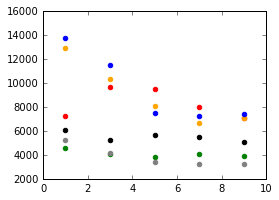

In [240]:
# including k for the funciton
def knn_train_test(train_col, target_col, df, k):
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse

rmses_losses = []
rmses_stroke = []
rmses_hp = []
rmses_rpm = []
rmses_base = []
rmses_engine = []

for k in [1, 3, 5, 7, 9]:
    rmse_losses = knn_train_test(['normalized_losses'], ['price'], cars_copy, k)
    rmses_losses.append(rmse_losses)
    rmse_stroke = knn_train_test(['stroke'], ['price'], cars_copy, k)
    rmses_stroke.append(rmse_stroke)
    rmse_hp = knn_train_test(['horsepower'], ['price'], cars_copy, k)
    rmses_hp.append(rmse_hp)
    rmse_rpm = knn_train_test(['peak_rpm'], ['price'], cars_copy, k)
    rmses_rpm.append(rmse_rpm)
    rmse_base = knn_train_test(['wheel_base'], ['price'], cars_copy, k)
    rmses_base.append(rmse_base)
    rmse_engine = knn_train_test(['engine_size'], ['price'], cars_copy, k)
    rmses_engine.append(rmse_engine)
    
plt.figure(figsize=(4,3))    
plt.scatter([1, 3, 5, 7, 9], rmses_losses, color ='red')
plt.scatter([1, 3, 5, 7, 9], rmses_stroke, color='orange')
plt.scatter([1, 3, 5, 7, 9], rmses_hp, color = 'green')
plt.scatter([1, 3, 5, 7, 9], rmses_rpm, color = 'blue')
plt.scatter([1, 3, 5, 7, 9], rmses_base, color = 'black')
plt.scatter([1, 3, 5, 7, 9], rmses_engine, color = 'gray')

In [242]:
# modify the fucntion to work with multiple columns
def knn_train_test(train_col, target_col, df):
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse
rmse_two = knn_train_test(['horsepower', 'engine_size'], ['price'], cars_copy)
print('rmse_two', rmse_two)
rmse_three = knn_train_test(['horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy)
print('rmse_three', rmse_three)
rmse_four = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy)
print('rmse_four', rmse_four)
rmse_five = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke'], ['price'], cars_copy)
print('rmse_five', rmse_five)

rmse_two 3426.023181717641
rmse_three 3640.1282416740946
rmse_four 3938.966279791353
rmse_five 3272.9733654329257


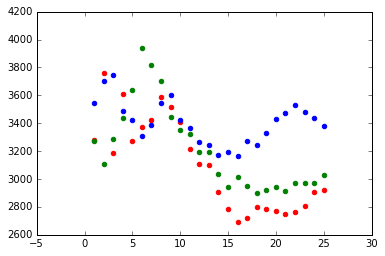

In [243]:
def knn_train_test(train_col, target_col, df, k):
    l = int(len(df)*0.75)
    train_df = df.iloc[0:l][train_col]
    train_df[target_col] = df.iloc[0:l][target_col]
    test_df = df.iloc[l:len(df)][train_col]
    test_df[target_col] = df.iloc[l:len(df)][target_col]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**0.5
    return rmse

rmses_five = []
rmses_two = []
rmses_three = []

for k in range(1,26):
    rmse_five = knn_train_test(['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke'], ['price'], cars_copy, k)
    rmses_five.append(rmse_five)
    rmse_two = knn_train_test(['horsepower', 'engine_size'], ['price'], cars_copy, k)
    rmses_two.append(rmse_two)
    rmse_three = knn_train_test(['horsepower', 'engine_size', 'wheel_base'], ['price'], cars_copy, k)
    rmses_three.append(rmse_three)
plt.scatter(list(range(1,26)), rmses_five, color ='red')
plt.scatter(list(range(1,26)), rmses_two, color='blue')
plt.scatter(list(range(1,26)), rmses_three, color = 'green')

#### prediction using k-fold cross validation instead of test/train validation

In [244]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
cols = ['normalized_losses', 'horsepower', 'engine_size', 'wheel_base', 'stroke']
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, cars_copy[cols], cars_copy["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "  std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  3607.938644086265   std RMSE:  160.98717821812252
5 folds:  avg RMSE:  3306.345462839101   std RMSE:  521.1429226791504
7 folds:  avg RMSE:  3179.81422976272   std RMSE:  819.2218000812567
9 folds:  avg RMSE:  2870.982910498852   std RMSE:  1138.508148676529
10 folds:  avg RMSE:  2944.023562681618   std RMSE:  1130.8905255252612
11 folds:  avg RMSE:  2751.181892816185   std RMSE:  1210.16130634554
13 folds:  avg RMSE:  2862.331193469457   std RMSE:  1097.931262861495
15 folds:  avg RMSE:  2766.2381127479343   std RMSE:  1355.9301349300836
17 folds:  avg RMSE:  2771.8706792970565   std RMSE:  1387.7957146673268
19 folds:  avg RMSE:  2703.876272786232   std RMSE:  1408.8955374255072
21 folds:  avg RMSE:  2835.9196538388446   std RMSE:  1390.8919781475938
23 folds:  avg RMSE:  2643.4619624290194   std RMSE:  1418.5237904372023
